# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [1]:
# from __future__ import division

import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [132]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
datos = np.random.randint(0, 255, (100, 3))


15

## SOM Setup
#### Variables definidas por el alumno

In [172]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 40
periodo = 15000
learning_rate = 0.03
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [173]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = 3
num_datos = 100

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

def minmax_norm(datos_input):
    return (datos - datos.min()) / ( datos.max() - datos.min())
## Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    datos = minmax_norm(datos)
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_pesos = np.random.random((lado_mapa,lado_mapa,3))


#### Funciones para entrenar/clasificar

In [138]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
    MenorDist=0
    MejorVector=[0,0,0]
    a=[]
    Resultado=0
    idx=[]
    
    for i in range(m-1):
        for j in range(m-1):
            
            a=m_pesos[i][j]
            Resultado=math.sqrt((a[0]-patron_entrada[0])**2 + (a[1]-patron_entrada[1])**2 + (a[2]-patron_entrada[2])**2)
            if i == 0 and j==0 :
                MenorDist=Resultado
                MejorVector=m_pesos[i][j]
                idx=[i,j]
            else:
                if MenorDist>Resultado:
                    #print(m_pesos[i][j])
                    MenorDist=Resultado
                    MejorVector=m_pesos[i][j]
                    idx=[i,j]
    if len(idx)<2:
        print("patron: ", patron_entrada)
        print("coor: ",idx)
        print("Peso: ",MejorVector,"i,j: ", i,j)
        print("Distancia: ",MenorDist)
        
    #print("BMU: ", MejorVector, "Index: ", idx)
    return MejorVector,idx


In [149]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    
    #lr_final = lr_inicial * (1 - i/n_iteraciones) 
    learning_rate = lr_inicial + (-lr_inicial/n_iteraciones)*i
    return learning_rate

In [140]:
#Función para calcular la distancia euclidea
def distancia(patron, peso):
    return ((patron[0]-peso[0])**2 + (patron[1]-peso[1])**2 + (patron[2]-peso[2])**2)**0.5

In [141]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    
    vecindario_i = 1 + vecindario_inicial * (1 - i/n_iteraciones)
    return vecindario_i

#eta=variacion_learning_rate(learning_rate, i+1, periodo)#calculamos eta
#v=variacion_vecindario(vecindario, i+1, periodo)#calculamos el vecindario
#matriz_pesos[3][2] + eta*decay(deu, v)*(patron-matriz_pesos[w][j])
#matriz_pesos[3][2][1]

In [142]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

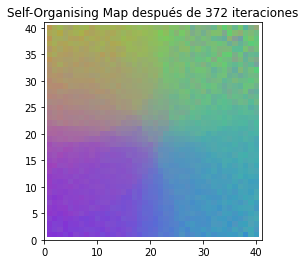

In [175]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores, iteracion):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % iteracion)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            #print(matriz_valores[x-1,y-1,:])
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()
#pintar_mapa(matriz_pesos,5000)
pintar_mapa(matriz_pesos,i+1)

## SOM Entrenamiento

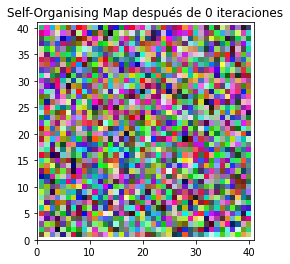

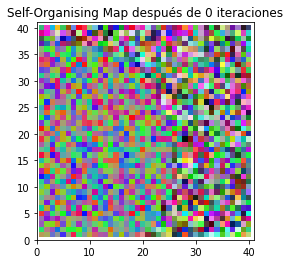

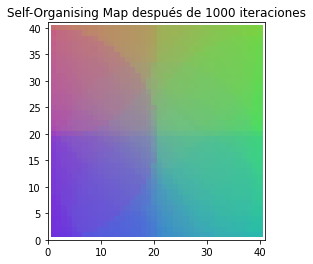

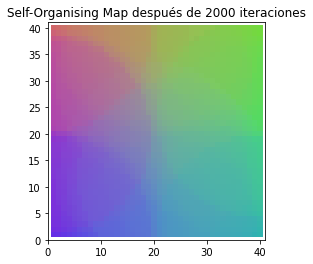

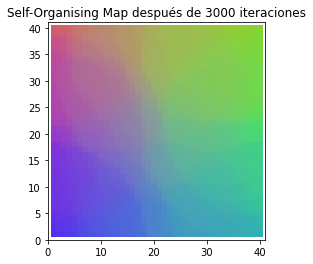

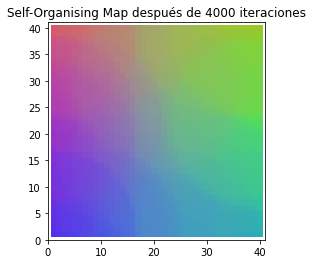

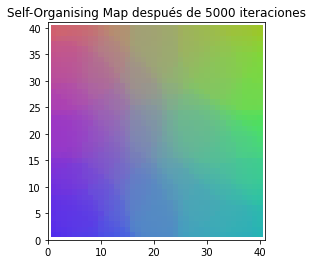

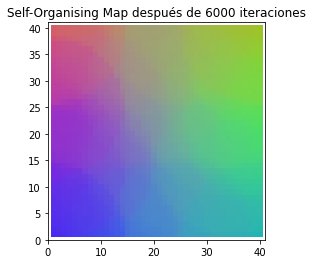

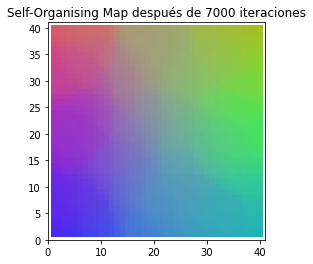

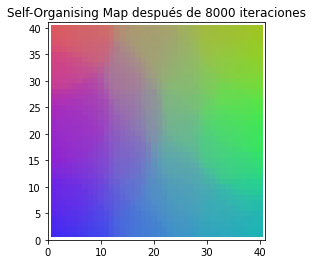

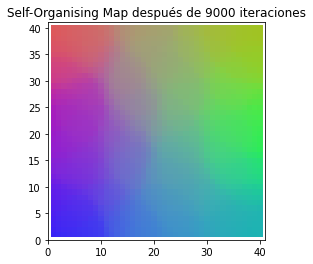

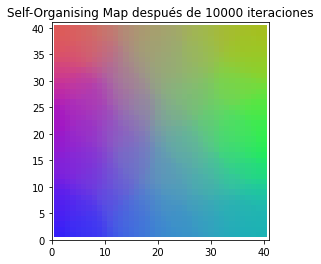

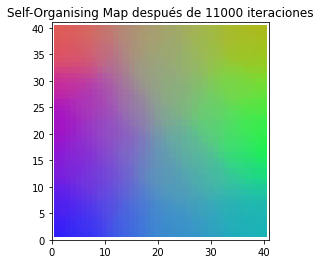

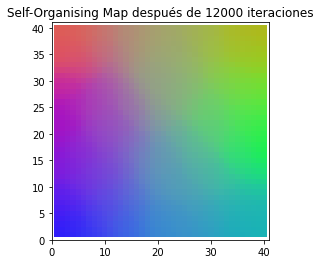

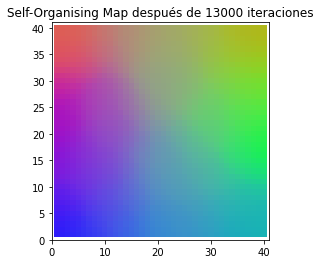

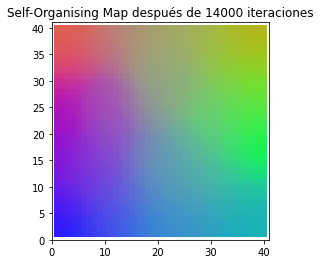

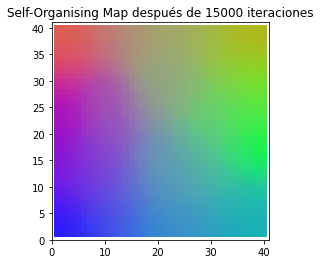

In [176]:
# Entrena la red con el dataset de entrenamiento

matriz_pesos = np.random.random((lado_mapa,lado_mapa,3))

pintar_mapa(matriz_pesos,0)
for i in range(periodo+1):
    color=np.random.randint(0, 100)
    patron=datos[color]
    BMU, coordenadas = calcular_bmu(patron, matriz_pesos, lado_mapa)#encontramos la bmu y sus coordenadas
    eta=variacion_learning_rate(learning_rate, i+1, periodo)#calculamos eta
    v=variacion_vecindario(vecindario, i+1, periodo)#calculamos el vecindario
    
    #comprobamos cuales son las neuronas del vecindario de la BMU
    for w in range(len(matriz_pesos)):
        for j in range(len(matriz_pesos)):
            deu= ((w-coordenadas[0])**2 + (j-coordenadas[1])**2 )**0.5
            
            if deu <= v :
                amortiguacion= decay(deu, v)
                matriz_pesos[w][j]= matriz_pesos[w][j]/(matriz_pesos[w][j][0]**2 + matriz_pesos[w][j][1]**2 + matriz_pesos[w][j][2]**2)**0.5
                matriz_pesos[w][j]= matriz_pesos[w][j] + eta*amortiguacion*(patron-matriz_pesos[w][j])
                
                
    
    #if (i)<100:
    #    if i%20==0:
    #        pintar_mapa(matriz_pesos,i+1)
    #if (i)<1000:
    #    if i%200==0:
    #        pintar_mapa(matriz_pesos,i+1)
    #if (i)>1000:
    if i%1000==0:
         pintar_mapa(matriz_pesos,i)
    

## SOM Clasificación

In [181]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada
clasi = np.zeros((lado_mapa, lado_mapa,3))
activacion = np.zeros((lado_mapa, lado_mapa))
distancias=np.zeros((lado_mapa, lado_mapa))
datos = np.random.randint(0, 255, (100, 3))
existe= False
sumita=0
clase=0
for i in range(len(datos)):
    patron=datos[i]
    BMU, coor = calcular_bmu(patron, matriz_pesos, lado_mapa)#encontramos la bmu y sus coordenadas
    #print(coor[0])
    clasi[coor[0]][coor[1]]=patron
    #distancias.append(distancia(patron,BMU)/3)
    activacion[coor[0]][coor[1]]+=1
        
    existe=False
#for a in range(len(activaciones)):
#    if activaciones[a][1] >1:
#        print("2 veces")
#

#error=sum(distancias)/len(distancias)
#error
for g in range(39):
    for t in range(39):
        sumita = sumita + activacion[g][t]
        if  activacion[g][t] > 0:
            clase+=1
            
clase

84

## SOM Prueba

In [128]:
# Clasifica nuevos patrones
num=0
for k in range(len(clasi)):
    for l in range(len(clasi)):
        if clasi[k][l].all() ==0:
            num+=1
num

160

In [160]:
hola=[]
hola.append([coor,1])
len(activaciones)

13647